In [16]:
#Packages
%pylab
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.ndimage
import matplotlib.pyplot as plt
import pandas
from images_segmentation import otsu
from images_segmentation import dicescore as dsc

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [11]:
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png") 
img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t52.tif")
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
figure()
#sw1 = i_sw(img_1, 50, 150, 0.5)
figure()
#sw2 = i_sw(img_2, 5, 100)
figure()
#sw3 = i_sw(img_3, 150, 350, 0.7)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
def crop(image, xmin, ymin, xmax, ymax):
    cropped=np.empty([xmax-xmin, ymax-ymin], dtype=float)
    for a,b in np.ndindex(xmax-xmin, ymax-ymin):
        cropped[a,b]=image[a+xmin,b+ymin]
    return cropped

In [18]:
def otsu_i(image,selectivity):
    if numpy.isnan(numpy.sum(image)):
        img1 = image[:, ~np.isnan(image).all(axis=0)]
        img2 = img1[~np.isnan(image).all(axis=1), :]
        img=otsu.otsu_thresholding(img2, 256)
    else :
        img=otsu.otsu_thresholding(image, 256)
    return img

In [28]:

def i_sw(image,stepsize,framesize, sensitivity):
    img=np.empty([image.shape[0]+framesize,image.shape[1]+framesize,])
    img[:]=np.NaN
    for i,j in np.ndindex(image.shape[0], image.shape[1]):
        img[i,j]=image[i,j]
    it=np.zeros([img.shape[0],img.shape[1],2])
    x=0
    y=0
    while x+framesize<=img.shape[0]:
        while y+framesize<=img.shape[1]:
            post_otsu = otsu_i(img[x:x+framesize,y:y+framesize], sensitivity)
            for a,b in np.ndindex(post_otsu.shape[0],post_otsu.shape[1]):
                it[x+a,y+b,0] +=post_otsu[a,b]
                it[x+a,y+b,1] += sensitivity
            print('window')
            y+=stepsize
        y=0
        print("row done")
        x+=stepsize
    print('window done')
    print(it)
    img=crop(img,0,0,image.shape[0],image.shape[1])
    print("cropped")
    for i, j in np.ndindex(img.shape[0], img.shape[1]):
        #img[i,j]=round(array[i,j,0]/(2*array[i,j,1]))
        #img[i,j]=round(it[i,j,0]/(2*it[i,j,1]))
        if it[i,j,0]>it[i,j,1]:
            img[i,j]=1
        else:
            img[i,j]=0
    img=crop(img,0,0,image.shape[0],image.shape[1])
    print("rounding done")
    figure()
    imshow(img,'gray')
    return img

window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
row done
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
row done
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
window
wi

<Figure size 432x288 with 0 Axes>

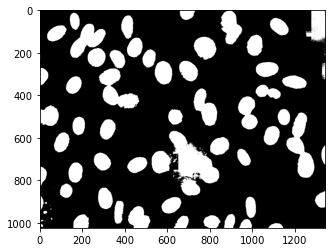

In [30]:
figure()
sw1 = i_sw(img_1, 25, 200, 0.5)